**Задача 1**  Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

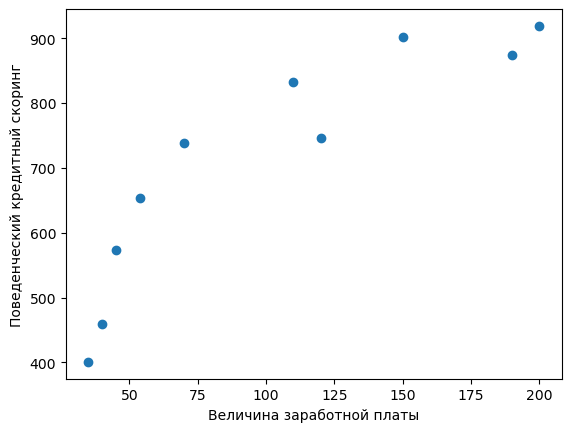

In [3]:
plt.scatter(zp,ks)
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг')
plt.show()

In [4]:
n = len(ks)
b1 = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp ** 2) - np.mean(zp) ** 2)
b1 

2.620538882402765

С интерсептом

In [5]:
b0 = np.mean(ks) - b1 * np.mean(zp)
b0

444.1773573243596

In [6]:
y_pred = b0 + b1 * zp
y_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

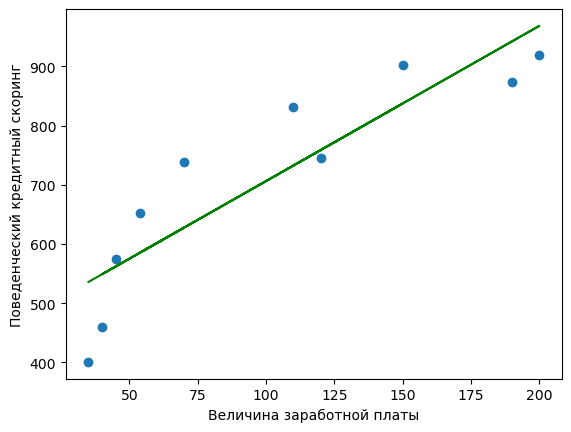

In [7]:
plt.scatter(zp, ks)
plt.plot(zp, y_pred, c='g')
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг')
plt.show()

Средняя квадратичная ошибка

In [8]:
mse_ = np.sum(((b0 + b1 * zp) - ks) ** 2 / n)
mse_

6470.414201176659

без интерсепта

In [10]:
zp1 = zp.reshape(1, n)
ks1 = ks.reshape(1, n)

In [11]:
b1 = np.dot(np.dot(np.linalg.inv(np.dot(zp1, zp1.T)), zp1), ks1.T)[0][0]
b1

5.889820420132689

In [12]:
y_pred1 = b1 * zp
y_pred1

array([ 206.1437147 ,  265.04191891, 1119.06587983, 1177.96408403,
        235.59281681,  412.28742941,  318.05030269,  883.47306302,
        706.77845042,  647.88024621])

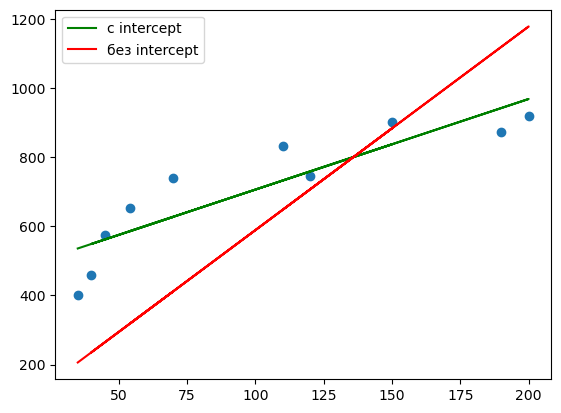

In [13]:
plt.scatter(zp, ks)
plt.plot(zp, y_pred, 'g', label = 'с intercept')
plt.plot(zp, y_pred1, 'r', label = 'без intercept')
plt.legend()
plt.show()

**Задача 2**  Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [14]:
import numpy as np

In [15]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [16]:
def _mse(b, x, y):
    return np.sum((b * x - y) ** 2) / len(x)

In [17]:
_mse(2.62, zp, ks)

203812.48504

Функция потерь 

In [18]:
def _mse_p(b,x,y):
    return (2 / len(x)) * np.sum((b * x - y) * x)

In [19]:
alpha = 1e-06

In [20]:
b = 0.1
mse_min = _mse(b,zp,ks)
i_min = 1
b_min = b
for i in range(10000):
    b -= alpha * _mse_p(b,zp,ks)
    if i%100==0:
        print(f'Итерация #{i}, b={b}, mse={_mse(b, zp,ks)}')
    if _mse(b,zp,ks)>mse_min:
        print(f'Итерация #{i_min}, b={b_min}, mse={mse_min},\nДостигнут минимум.')
        break
    else:
        mse_min = _mse(b,zp,ks)
        i_min = i
        b_min = b

Итерация #0, b=0.25952808000000005, mse=493237.7212546963
Итерация #100, b=5.54537842245223, mse=58151.31823171113
Итерация #200, b=5.868748638669329, mse=56522.97550129376
Итерация #300, b=5.888531320728348, mse=56516.88130936019
Итерация #400, b=5.8897415574471985, mse=56516.85850140053
Итерация #500, b=5.889815595583751, mse=56516.858416040064
Итерация #600, b=5.889820124983314, mse=56516.85841572062
Итерация #628, b=5.889820285147628, mse=56516.85841571966,
Достигнут минимум.
